# Workflow complet Analyse en Composantes Principales

In [2]:
# Importation des libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Chargement du dataset
datat = pd.read_excel('USDA_National_Nutrient_DataBase.xlsx')
datat

NDB_No                   Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0       1001            BUTTER,WITH SALT      15.87         717         0.85   
1       1002      BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
2       1003        BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3       1004                 CHEESE,BLUE      42.41         353        21.40   
4       1005                CHEESE,BRICK      41.11         371        23.24   
...      ...                         ...        ...         ...          ...   
8785   83110             MACKEREL,SALTED      43.00         305        18.50   
8786   90240  SCALLOP,(BAY&SEA),CKD,STMD      70.25         111        20.54   
8787   90480                  SYRUP,CANE      26.00         269         0.00   
8788   90560                   SNAIL,RAW      79.20          90        16.10   
8789   93600            TURTLE,GREEN,RAW      78.50          89        19.80   

      Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  \
0             81.11     2.11            0.06           0.0           0.06   
1             78.30     1.62            2.87           0.0           0.06   
2             99.48     0.00            0.00           0.0           0.00   
3             28.74     5.11            2.34           0.0           0.50   
4             29.68     3.18            2.79           0.0           0.51   
...             ...      ...             ...           ...            ...   
8785          25.10    13.40            0.00           0.0           0.00   
8786           0.84     2.97            5.41           0.0           0.00   
8787           0.00     0.86           73.14           0.0          73.20   
8788           1.40     1.30            2.00           0.0           0.00   
8789           0.50     1.20            0.00           0.0           0.00   

      ...  Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  \
0     ...         7.0      51.368       21.021        3.043           215.0   
1     ...         4.6      45.390       19.874        3.331           225.0   
2     ...         8.6      61.924       28.732        3.694           256.0   
3     ...         2.4      18.669        7.778        0.800            75.0   
4     ...         2.5      18.764        8.598        0.784            94.0   
...   ...         ...         ...          ...          ...             ...   
8785  ...         7.8       7.148        8.320        6.210            95.0   
8786  ...         0.0       0.218        0.082        0.222            41.0   
8787  ...         0.0       0.000        0.000        0.000             0.0   
8788  ...         0.1       0.361        0.259        0.252            50.0   
8789  ...         0.1       0.127        0.088        0.170            50.0   

      GmWt_1                          GmWt_Desc1  GmWt_2  \
0       5.00          1 pat,  (1" sq, 1/3" high)    14.2   
1       3.80          1 pat,  (1" sq, 1/3" high)     9.4   
2      12.80                              1 tbsp   205.0   
3      28.35                                1 oz    17.0   
4     132.00                        1 cup, diced   113.0   
...      ...                                 ...     ...   
8785   80.00  1 piece,  (5-1/2" x 1-1/2" x 1/2")    17.0   
8786   85.00                                3 oz     NaN   
8787   21.00                           1 serving     NaN   
8788   85.00                                3 oz     NaN   
8789   85.00                                3 oz     NaN   

                  GmWt_Desc2  Refuse_Pct  
0                     1 tbsp         0.0  
1                     1 tbsp         0.0  
2                      1 cup         0.0  
3               1 cubic inch         0.0  
4            1 cup, shredded         0.0  
...                      ...         ...  
8785  1 cubic inch, boneless         0.0  
8786                     NaN         0.0  
8787                     NaN         0.0  
8788                

In [4]:
#dimension de la base de donnees
datat.shape

(8790, 53)

In [5]:
#les 5 premieres lignes 
datat.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER,WITH SALT      15.87         717         0.85   
1    1002  BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE,BLUE      42.41         353        21.40   
4    1005            CHEESE,BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          78.30     1.62            2.87           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0         7.0      51.368       21.021        3.043           215.0    5.00   
1         4.6      45.390       19.874        3.331           225.0    3.80   
2         8.6      61.924       28.732        3.694           256.0   12.80   
3         2.4      18.669        7.778        0.800            75.0   28.35   
4         2.5      18.764        8.598        0.784            94.0  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat,  (1" sq, 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat,  (1" sq, 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup, diced   113.0  1 cup, shredded         0.0  

[5 rows x 53 columns]

In [6]:
#changer la colonnes Ndb_no en index
datat = datat.set_index('NDB_No')

In [7]:
#les 5 dernieres lignes 
datat.tail()

Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
NDB_No                                                                   
83110              MACKEREL,SALTED      43.00         305        18.50   
90240   SCALLOP,(BAY&SEA),CKD,STMD      70.25         111        20.54   
90480                   SYRUP,CANE      26.00         269         0.00   
90560                    SNAIL,RAW      79.20          90        16.10   
93600             TURTLE,GREEN,RAW      78.50          89        19.80   

        Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  \
NDB_No                                                                        
83110           25.10    13.40            0.00           0.0            0.0   
90240            0.84     2.97            5.41           0.0            0.0   
90480            0.00     0.86           73.14           0.0           73.2   
90560            1.40     1.30            2.00           0.0            0.0   
93600            0.50     1.20            0.00           0.0            0.0   

        Calcium_(mg)  ...  Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  \
NDB_No                ...                                                     
83110           66.0  ...         7.8       7.148        8.320        6.210   
90240           10.0  ...         0.0       0.218        0.082        0.222   
90480           13.0  ...         0.0       0.000        0.000        0.000   
90560           10.0  ...         0.1       0.361        0.259        0.252   
93600          118.0  ...         0.1       0.127        0.088        0.170   

        Cholestrl_(mg)  GmWt_1                          GmWt_Desc1  GmWt_2  \
NDB_No                                                                       
83110             95.0    80.0  1 piece,  (5-1/2" x 1-1/2" x 1/2")    17.0   
90240             41.0    85.0                                3 oz     NaN   
90480              0.0    21.0                           1 serving     NaN   
90560             50.0    85.0                                3 oz     NaN   
93600             50.0    85.0                                3 oz     NaN   

                    GmWt_Desc2  Refuse_Pct  
NDB_No                                      
83110   1 cubic inch, boneless         0.0  
90240                      NaN         0.0  
90480                      NaN         0.0  
90560                      NaN         0.0  
93600                      NaN         0.0  

[5 rows x 52 columns]

In [8]:
# les noms des colonnes 
datat.columns

Index(['Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',
       'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)',
       'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [9]:
# avoir les informations sur ma base de donnees
datat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 1001 to 93600
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shrt_Desc          8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 n

In [10]:
# verifier les doublons
doublons = datat[datat.duplicated()]
doublons

Empty DataFrame
Columns: [Shrt_Desc, Water_(g), Energ_Kcal, Protein_(g), Lipid_Tot_(g), Ash_(g), Carbohydrt_(g), Fiber_TD_(g), Sugar_Tot_(g), Calcium_(mg), Iron_(mg), Magnesium_(mg), Phosphorus_(mg), Potassium_(mg), Sodium_(mg), Zinc_(mg), Copper_mg), Manganese_(mg), Selenium_(µg), Vit_C_(mg), Thiamin_(mg), Riboflavin_(mg), Niacin_(mg), Panto_Acid_mg), Vit_B6_(mg), Folate_Tot_(µg), Folic_Acid_(µg), Food_Folate_(µg), Folate_DFE_(µg), Choline_Tot_ (mg), Vit_B12_(µg), Vit_A_IU, Vit_A_RAE, Retinol_(µg), Alpha_Carot_(µg), Beta_Carot_(µg), Beta_Crypt_(µg), Lycopene_(µg), Lut+Zea_ (µg), Vit_E_(mg), Vit_D_µg, Vit_D_IU, Vit_K_(µg), FA_Sat_(g), FA_Mono_(g), FA_Poly_(g), Cholestrl_(mg), GmWt_1, GmWt_Desc1, GmWt_2, GmWt_Desc2, Refuse_Pct]
Index: []

[0 rows x 52 columns]

In [11]:
# les types des variables de la base de donnees
datat.dtypes


Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)         float64
Alpha_Carot_(µ

In [12]:
#je vais pas utiliser toutes les variables je selection celles qui sont importantes
data = datat[['Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Calcium_(mg)','Iron_(mg)','Sodium_(mg)','Water_(g)','Magnesium_(mg)','Phosphorus_(mg)','Vit_C_(mg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)']]
data

Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
NDB_No                                                                         
1001           717         0.85          81.11            0.06           0.0   
1002           718         0.49          78.30            2.87           0.0   
1003           876         0.28          99.48            0.00           0.0   
1004           353        21.40          28.74            2.34           0.0   
1005           371        23.24          29.68            2.79           0.0   
...            ...          ...            ...             ...           ...   
83110          305        18.50          25.10            0.00           0.0   
90240          111        20.54           0.84            5.41           0.0   
90480          269         0.00           0.00           73.14           0.0   
90560           90        16.10           1.40            2.00           0.0   
93600           89        19.80           0.50            0.00           0.0   

        Calcium_(mg)  Iron_(mg)  Sodium_(mg)  Water_(g)  Magnesium_(mg)  \
NDB_No                                                                    
1001            24.0       0.02        643.0      15.87             2.0   
1002            23.0       0.05        583.0      16.72             1.0   
1003             4.0       0.00          2.0       0.24             0.0   
1004           528.0       0.31       1146.0      42.41            23.0   
1005           674.0       0.43        560.0      41.11            24.0   
...              ...        ...          ...        ...             ...   
83110           66.0       1.40       4450.0      43.00            60.0   
90240           10.0       0.58        667.0      70.25            37.0   
90480           13.0       3.60         58.0      26.00            10.0   
90560           10.0       3.50         70.0      79.20           250.0   
93600          118.0       1.40         68.0      78.50            20.0   

        Phosphorus_(mg)  Vit_C_(mg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  
NDB_No                                                                     
1001               24.0         0.0      51.368       21.021        3.043  
1002               24.0         0.0      45.390       19.874        3.331  
1003                3.0         0.0      61.924       28.732        3.694  
1004              387.0         0.0      18.669        7.778        0.800  
1005              451.0         0.0      18.764        8.598        0.784  
...                 ...         ...         ...          ...          ...  
83110             254.0         0.0       7.148        8.320        6.210  
90240             426.0         0.0       0.218        0.082        0.222  
90480               8.0         0.0       0.000        0.000        0.000  
90560             272.0         0.0       0.361        0.259        0.252  
93600             180.0         0.0       0.127        0.088        0.170  

[8790 rows x 15 columns]

In [13]:
# statistiques sur la base de donnes: variables quantitatives
data.describe()

Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
count  8790.000000  8790.000000    8790.000000     8790.000000   8196.000000   
mean    226.317634    11.342849      10.553725       22.127710      2.187445   
std     169.877539    10.530474      15.814842       27.270822      4.383138   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%      91.000000     2.380000       0.950000        0.050000      0.000000   
50%     191.000000     8.000000       5.140000        9.340000      0.700000   
75%     337.000000    19.880000      13.720000       34.910000      2.600000   
max     902.000000    88.320000     100.000000      100.000000     79.000000   

       Calcium_(mg)    Iron_(mg)   Sodium_(mg)    Water_(g)  Magnesium_(mg)  \
count   8442.000000  8646.000000   8707.000000  8789.000000     8051.000000   
mean      76.738214     2.699674    312.495923    54.112218       35.295988   
std      203.527453     5.687560    943.431341    30.772854       57.416785   
min        0.000000     0.000000      0.000000     0.000000        0.000000   
25%       10.000000     0.540000     41.000000    29.700000       12.000000   
50%       21.000000     1.380000     88.000000    63.080000       21.000000   
75%       69.000000     2.600000    404.500000    77.960000       30.000000   
max     7364.000000   123.600000  38758.000000   100.000000      781.000000   

       Phosphorus_(mg)   Vit_C_(mg)   FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  
count      8211.000000  7972.000000  8441.000000  8124.000000  8125.000000  
mean        165.142126     9.231134     3.576334     4.081006     2.288767  
std         204.704214    68.854696     6.518840     7.010760     5.215654  
min           0.000000     0.000000     0.000000     0.000000     0.000000  
25%          51.000000     0.000000     0.220000     0.235750     0.220000  
50%         145.000000     0.000000     1.592000     1.938500     0.696000  
75%         220.000000     3.500000     4.345000     5.115000     2.081000  
max        9918.000000  2732.000000    95.600000    83.689000    74.623000

In [14]:
#statisques sur toutes les variables : quantitatives et qualitatives 
data.describe(include='all')

Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
count  8790.000000  8790.000000    8790.000000     8790.000000   8196.000000   
mean    226.317634    11.342849      10.553725       22.127710      2.187445   
std     169.877539    10.530474      15.814842       27.270822      4.383138   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%      91.000000     2.380000       0.950000        0.050000      0.000000   
50%     191.000000     8.000000       5.140000        9.340000      0.700000   
75%     337.000000    19.880000      13.720000       34.910000      2.600000   
max     902.000000    88.320000     100.000000      100.000000     79.000000   

       Calcium_(mg)    Iron_(mg)   Sodium_(mg)    Water_(g)  Magnesium_(mg)  \
count   8442.000000  8646.000000   8707.000000  8789.000000     8051.000000   
mean      76.738214     2.699674    312.495923    54.112218       35.295988   
std      203.527453     5.687560    943.431341    30.772854       57.416785   
min        0.000000     0.000000      0.000000     0.000000        0.000000   
25%       10.000000     0.540000     41.000000    29.700000       12.000000   
50%       21.000000     1.380000     88.000000    63.080000       21.000000   
75%       69.000000     2.600000    404.500000    77.960000       30.000000   
max     7364.000000   123.600000  38758.000000   100.000000      781.000000   

       Phosphorus_(mg)   Vit_C_(mg)   FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  
count      8211.000000  7972.000000  8441.000000  8124.000000  8125.000000  
mean        165.142126     9.231134     3.576334     4.081006     2.288767  
std         204.704214    68.854696     6.518840     7.010760     5.215654  
min           0.000000     0.000000     0.000000     0.000000     0.000000  
25%          51.000000     0.000000     0.220000     0.235750     0.220000  
50%         145.000000     0.000000     1.592000     1.938500     0.696000  
75%         220.000000     3.500000     4.345000     5.115000     2.081000  
max        9918.000000  2732.000000    95.600000    83.689000    74.623000

<Axes: >

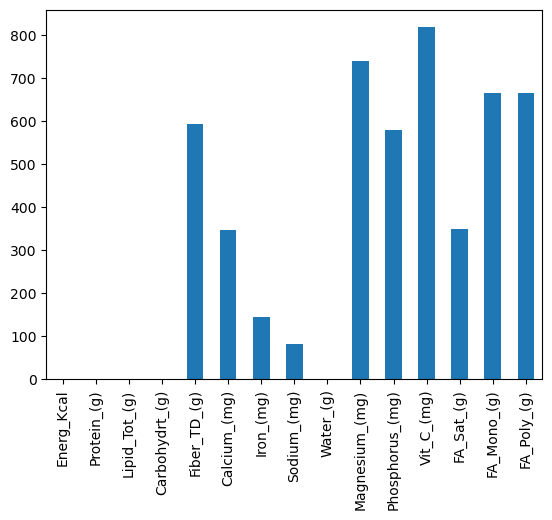

In [15]:
#les valeurs maquantes pour chaque variables
data.isna().sum().plot(kind='bar')

In [16]:
#je vais remplacer chaque valeur manquante des variables quantitatives par 0 
data = data.fillna(0)


data.isna().sum()

Energ_Kcal         0
Protein_(g)        0
Lipid_Tot_(g)      0
Carbohydrt_(g)     0
Fiber_TD_(g)       0
Calcium_(mg)       0
Iron_(mg)          0
Sodium_(mg)        0
Water_(g)          0
Magnesium_(mg)     0
Phosphorus_(mg)    0
Vit_C_(mg)         0
FA_Sat_(g)         0
FA_Mono_(g)        0
FA_Poly_(g)        0
dtype: int64

In [17]:
# Resume du dataset apres traitement des valeurs manquantes
data.describe()

Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
count  8790.000000  8790.000000    8790.000000     8790.000000   8790.000000   
mean    226.317634    11.342849      10.553725       22.127710      2.039625   
std     169.877539    10.530474      15.814842       27.270822      4.267904   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%      91.000000     2.380000       0.950000        0.050000      0.000000   
50%     191.000000     8.000000       5.140000        9.340000      0.400000   
75%     337.000000    19.880000      13.720000       34.910000      2.400000   
max     902.000000    88.320000     100.000000      100.000000     79.000000   

       Calcium_(mg)    Iron_(mg)   Sodium_(mg)    Water_(g)  Magnesium_(mg)  \
count   8790.000000  8790.000000   8790.000000  8790.000000     8790.000000   
mean      73.700114     2.655447    309.545165    54.106061       32.328555   
std      200.017998     5.651177    939.452380    30.776516       55.816105   
min        0.000000     0.000000      0.000000     0.000000        0.000000   
25%        8.000000     0.500000     38.000000    29.692500       10.000000   
50%       19.000000     1.325000     86.000000    63.080000       20.000000   
75%       64.000000     2.570000    401.000000    77.960000       29.000000   
max     7364.000000   123.600000  38758.000000   100.000000      781.000000   

       Phosphorus_(mg)   Vit_C_(mg)   FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  
count      8790.000000  8790.000000  8790.000000  8790.000000  8790.000000  
mean        154.264164     8.372082     3.434338     3.771797     2.115612  
std         202.043448    65.627097     6.426162     6.825884     5.050857  
min           0.000000     0.000000     0.000000     0.000000     0.000000  
25%          36.000000     0.000000     0.149000     0.074250     0.134250  
50%         130.000000     0.000000     1.435500     1.600000     0.591500  
75%         215.000000     2.500000     4.173750     4.759000     1.880000  
max        9918.000000  2732.000000    95.600000    83.689000    74.623000

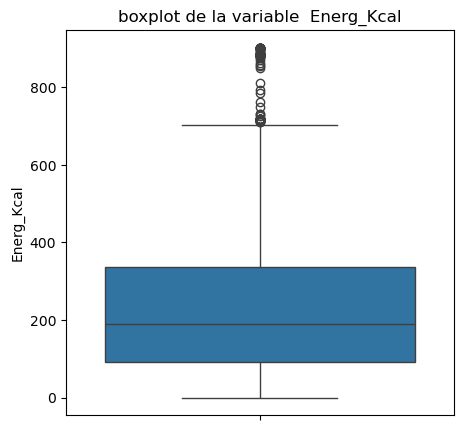

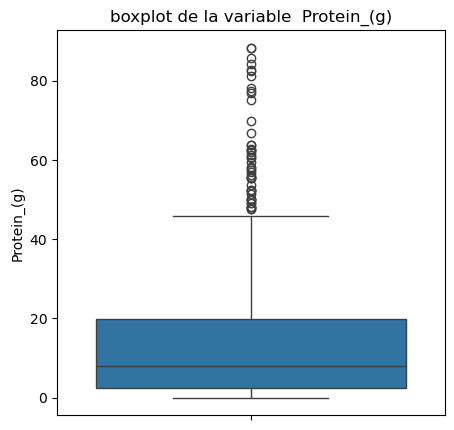

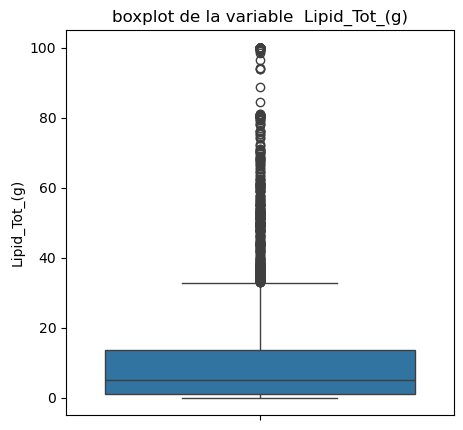

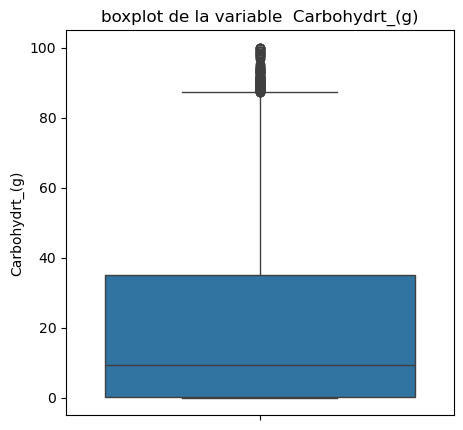

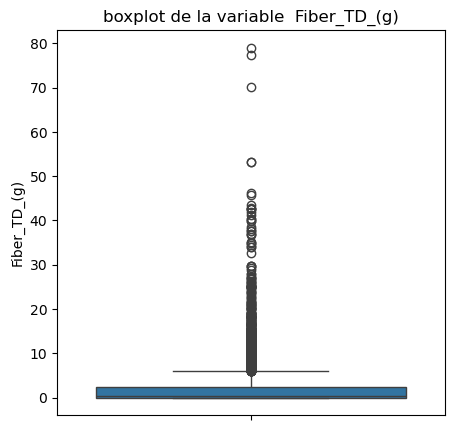

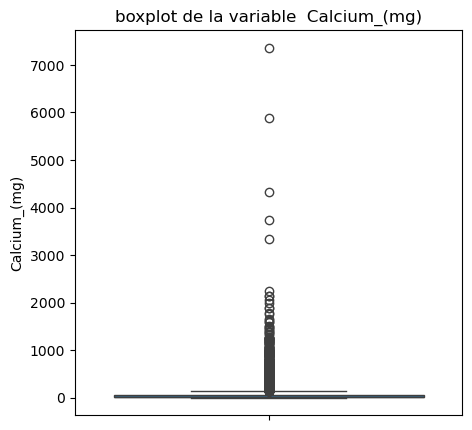

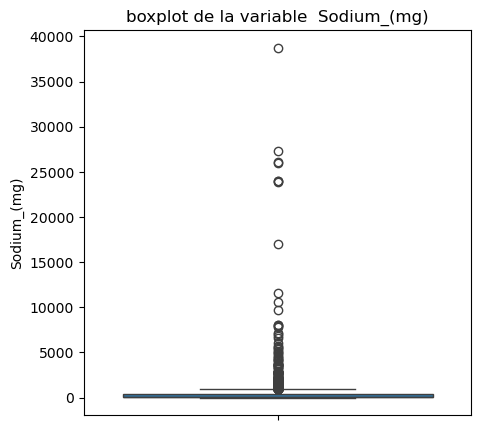

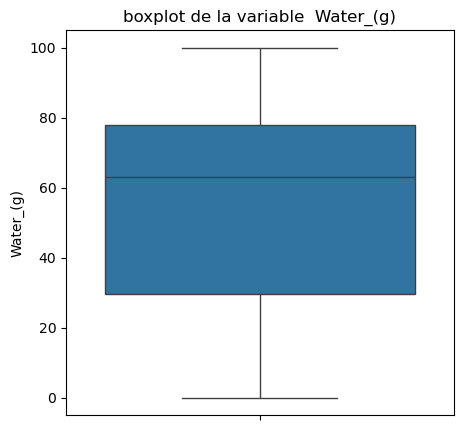

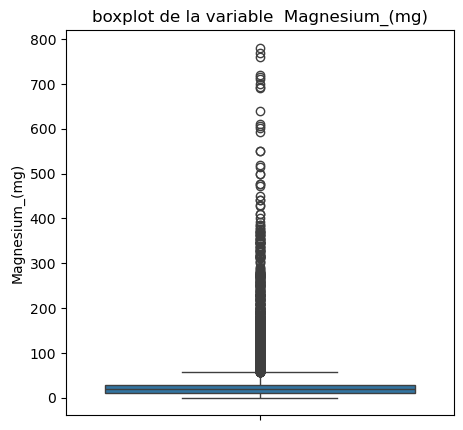

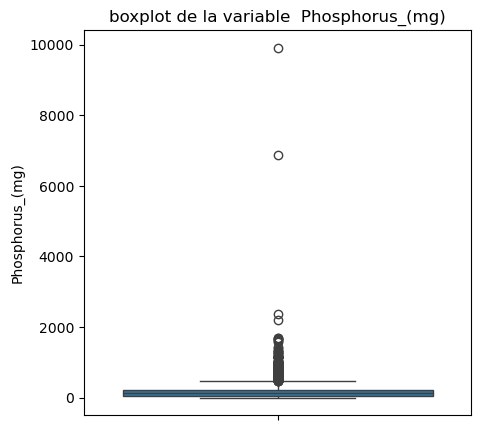

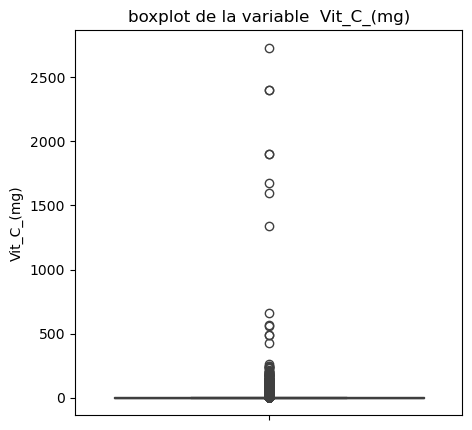

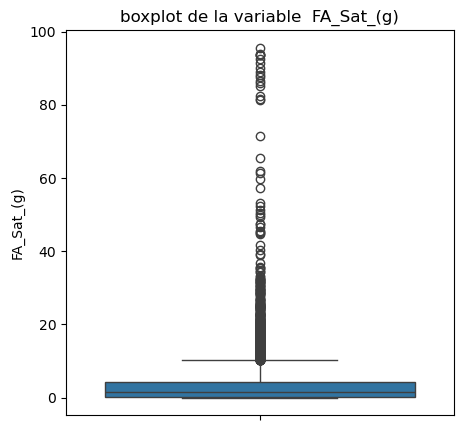

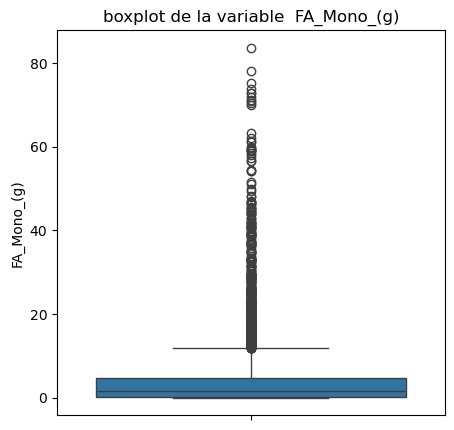

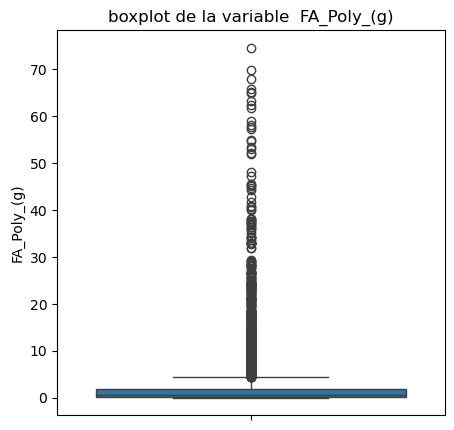

In [18]:
# Analyse univariee de chaque variable quantitives 
for col in data.columns:
    
    plt.figure(figsize=(5,5))
    sns.boxplot(data=data[col])
    plt.title(f'boxplot de la variable  {col}')

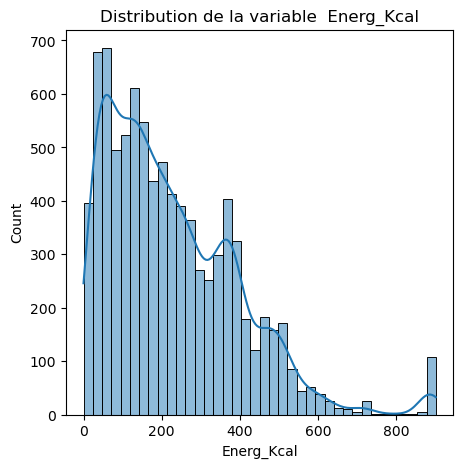

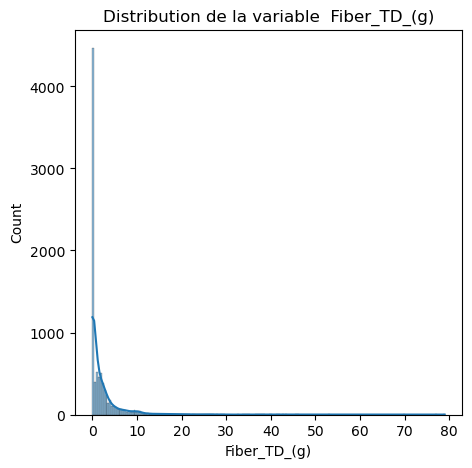

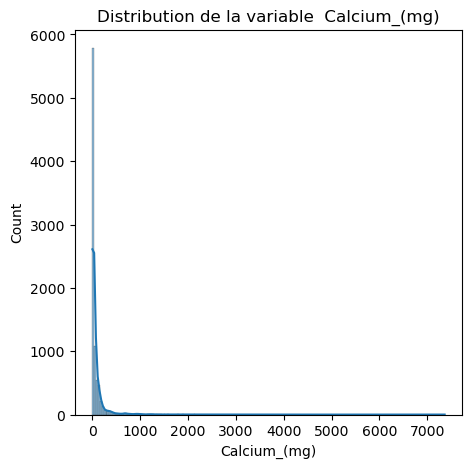

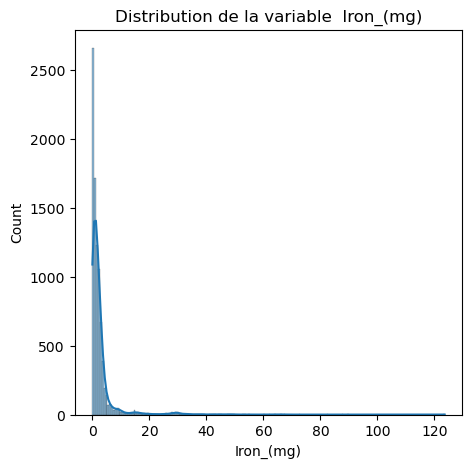

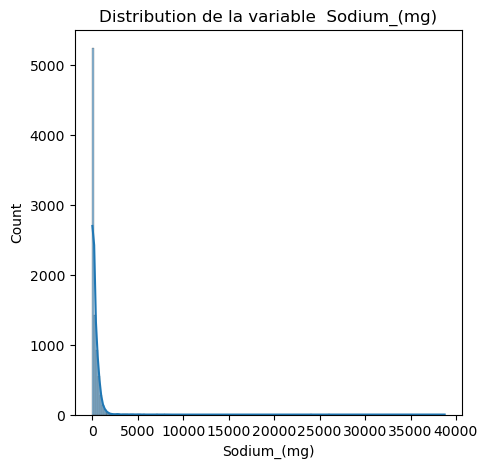

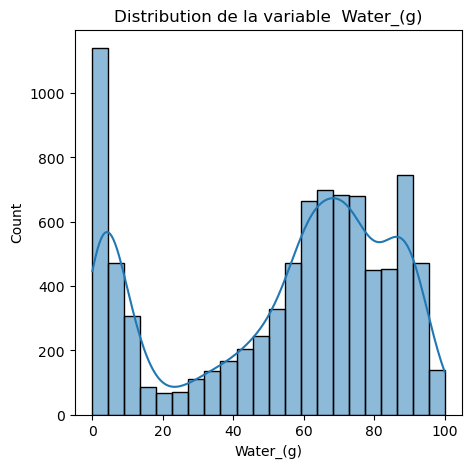

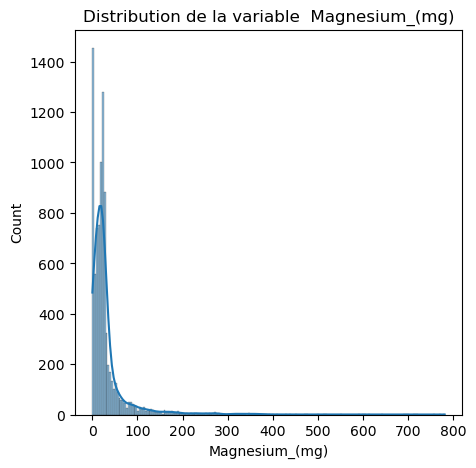

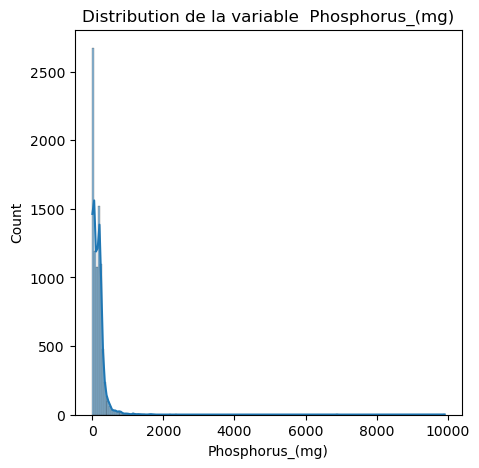

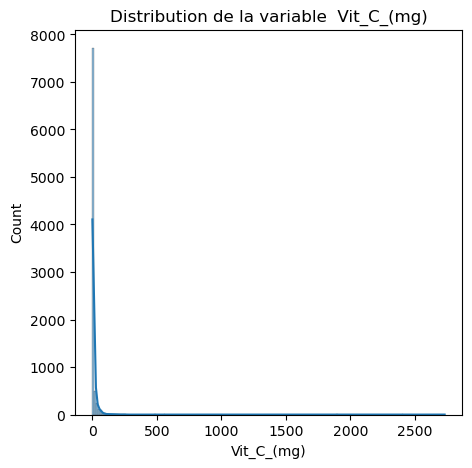

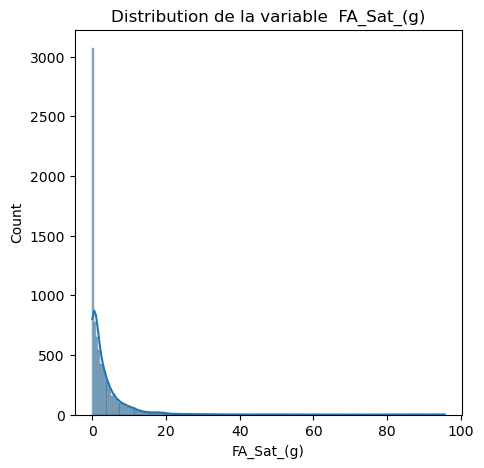

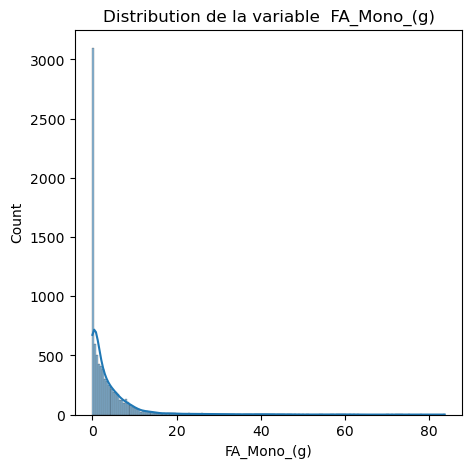

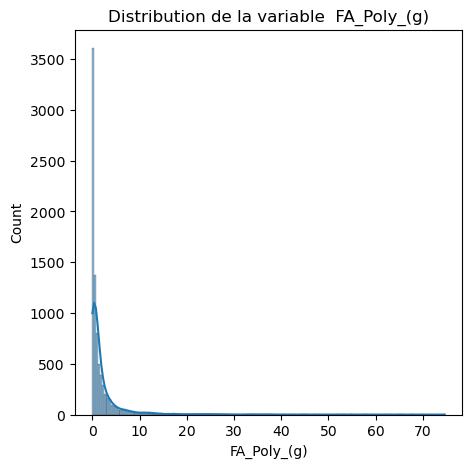

In [19]:
# analyse de la distribution de quelques variables
for col in data.columns:
    
    plt.figure(figsize=(5,5))
    sns.histplot(data=data,x=col,kde=True)
    plt.title(f'Distribution de la variable  {col}')

In [20]:
from scipy.stats import shapiro
import pandas as pd

In [21]:
normalite_tab = pd.DataFrame(columns=['var','p_value','normalite'])
for col in data.columns:
    stat ,p_value = shapiro(data[col])
    normalite = 'normale' if p_value>0.5 else 'anormale'
    normalite_tab.loc[len(normalite_tab)] = {'var':col,'p_value':p_value,'normalite':normalite}
normalite_tab
    

C:\Users\Fouodji Prudencia\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8790.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Fouodji Prudencia\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8790.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Fouodji Prudencia\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8790.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Fouodji Prudencia\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8790.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Fouodji Prudencia\anaconda3\Lib

var        p_value normalite
0        Energ_Kcal   2.936818e-57  anormale
1       Protein_(g)   7.289726e-64  anormale
2     Lipid_Tot_(g)   6.156719e-87  anormale
3    Carbohydrt_(g)   2.094739e-75  anormale
4      Fiber_TD_(g)   1.586657e-94  anormale
5      Calcium_(mg)  7.152178e-102  anormale
6         Iron_(mg)   4.867794e-99  anormale
7       Sodium_(mg)  1.695346e-105  anormale
8         Water_(g)   6.476250e-62  anormale
9    Magnesium_(mg)   1.440699e-95  anormale
10  Phosphorus_(mg)   9.354915e-94  anormale
11       Vit_C_(mg)  1.855745e-109  anormale
12       FA_Sat_(g)   2.216295e-94  anormale
13      FA_Mono_(g)   3.403663e-92  anormale
14      FA_Poly_(g)   2.158868e-98  anormale

(np.float64(-0.5), np.float64(499.5), np.float64(799.5), np.float64(-0.5))

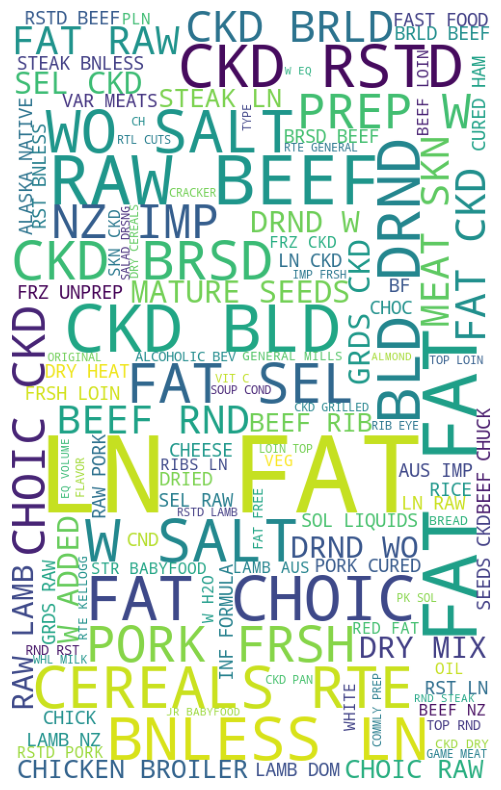

In [22]:
#!pip install wordcloud 
from wordcloud import WordCloud
text = ' '.join(datat['Shrt_Desc'])
wordcloud = WordCloud(width=500,height=800,background_color='white',min_font_size=10).generate(text)

plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')

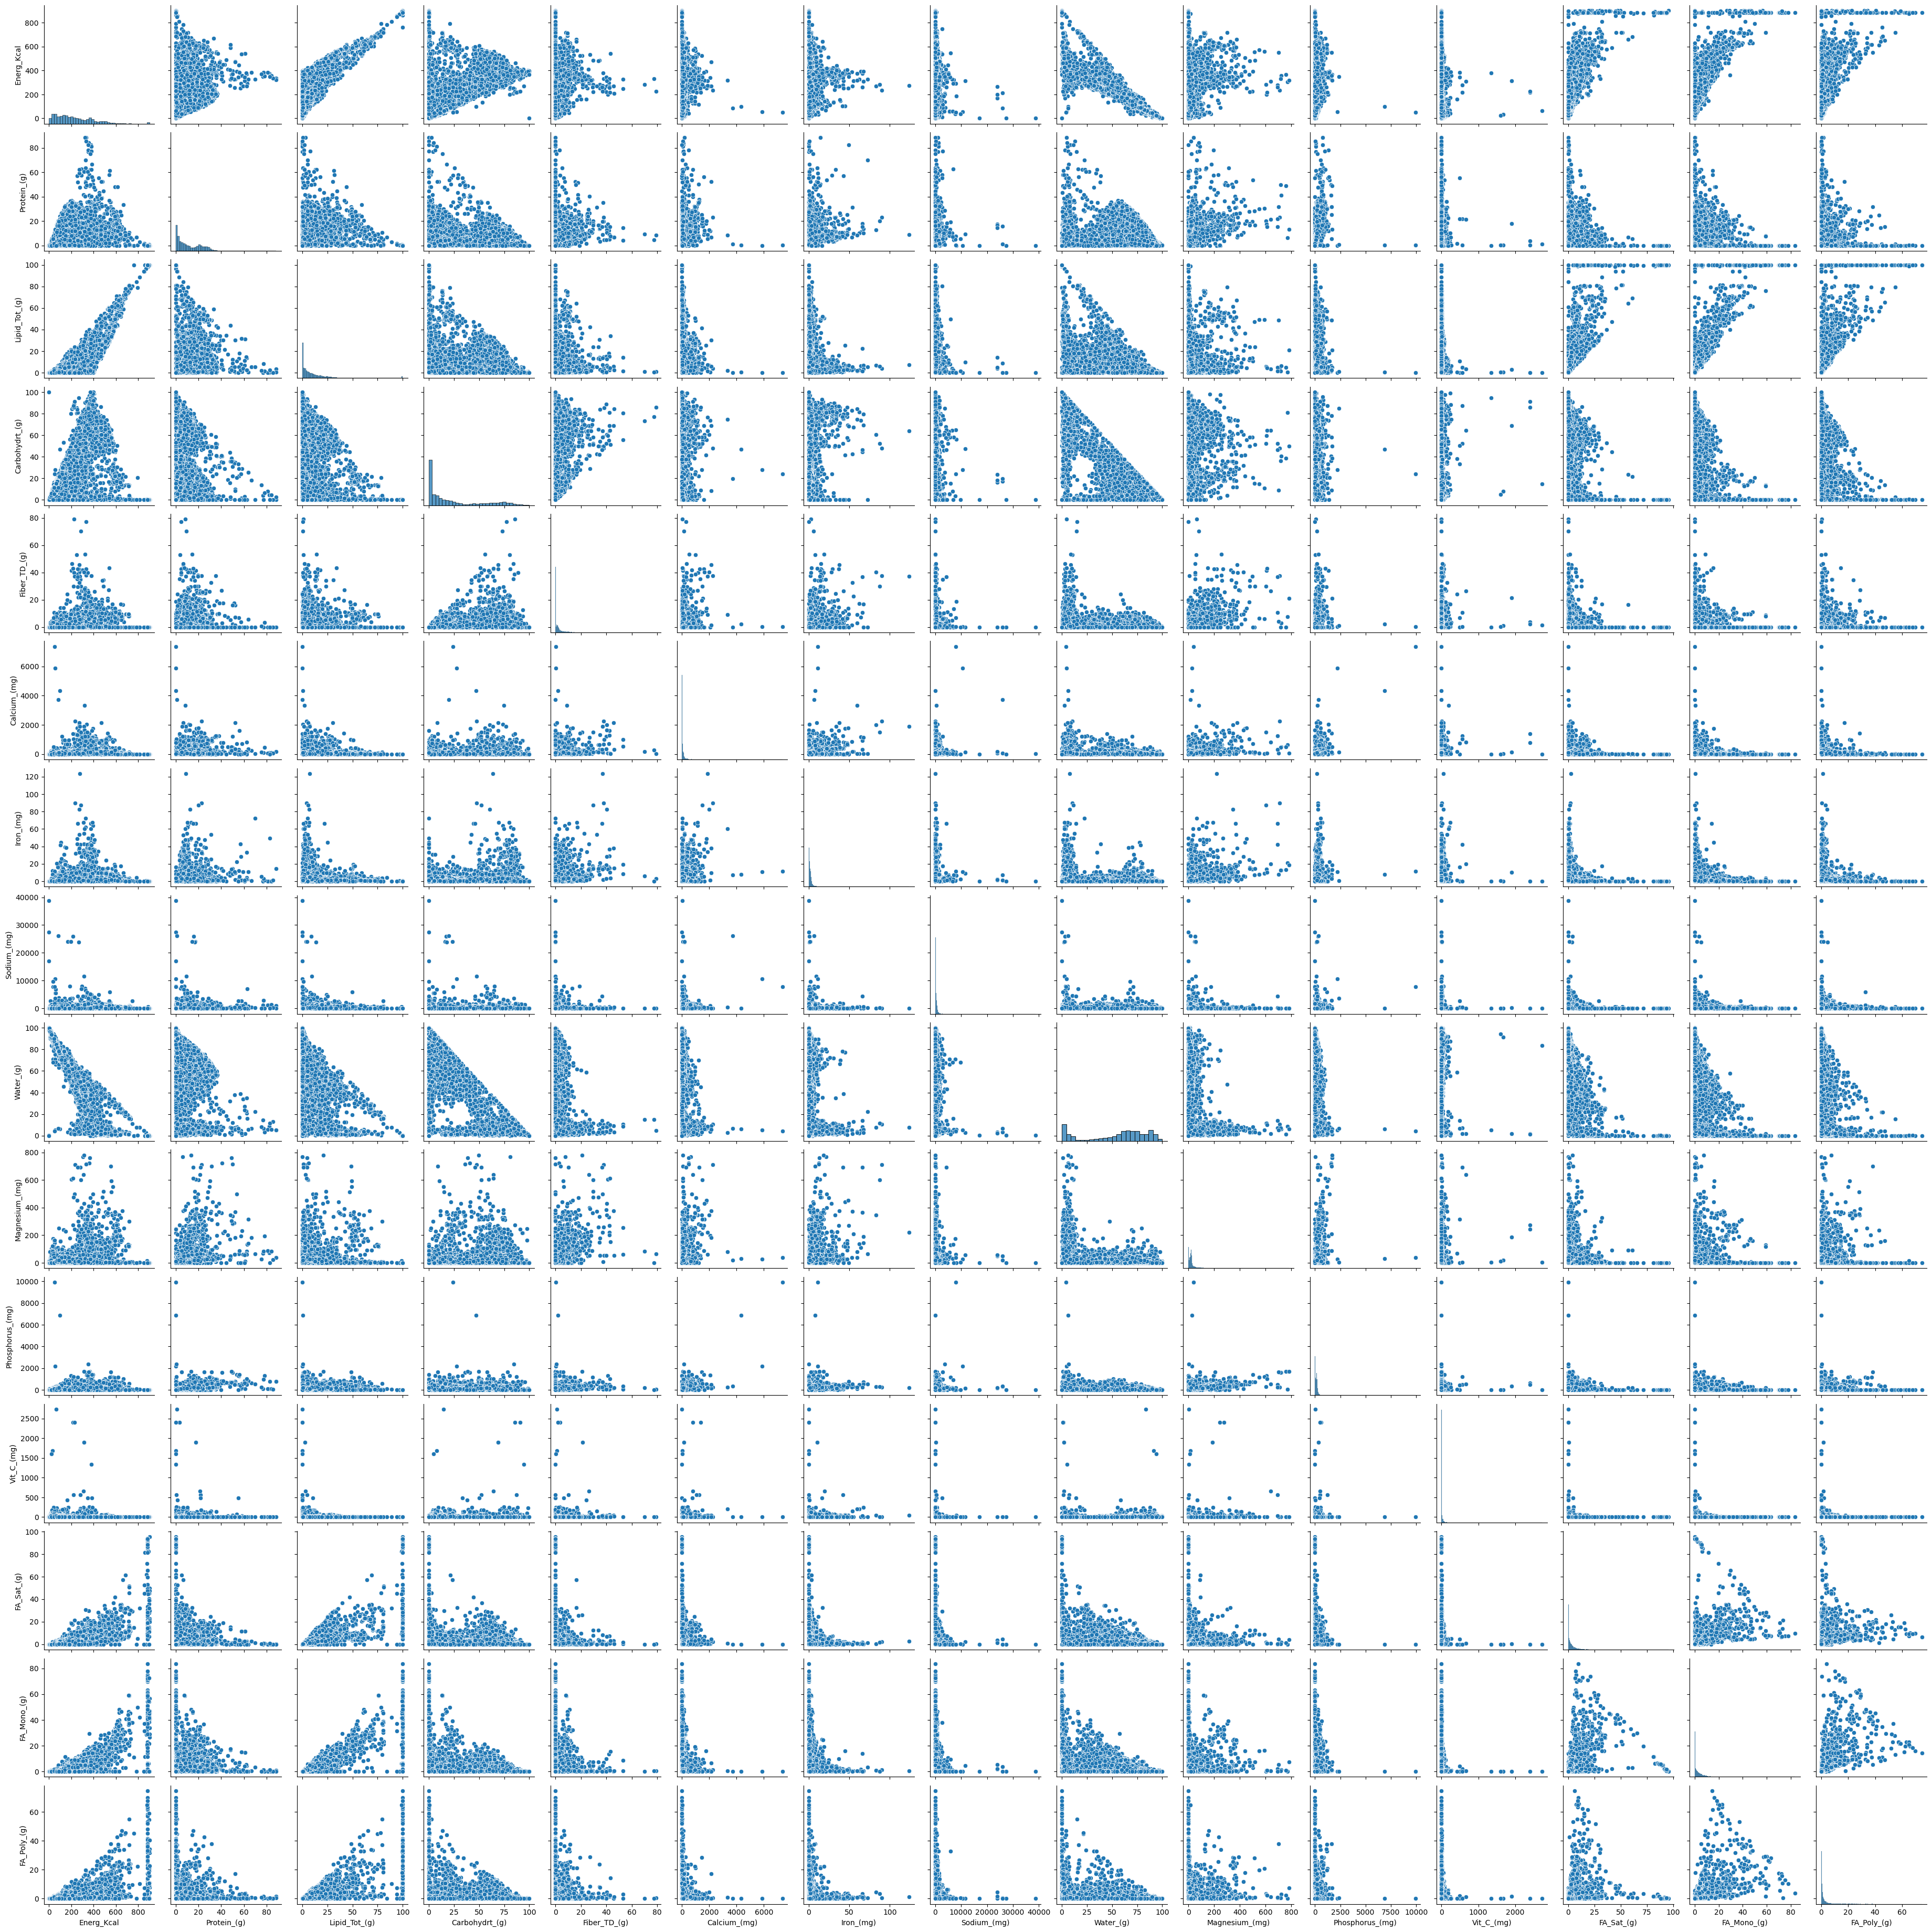

In [23]:
sns.pairplot(data=data)

<Axes: >

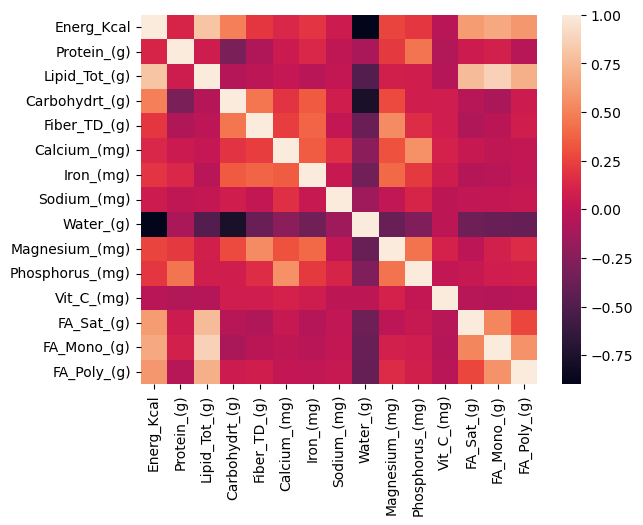

In [24]:
cor_matrice = data.corr()
sns.heatmap(cor_matrice)

<Axes: >

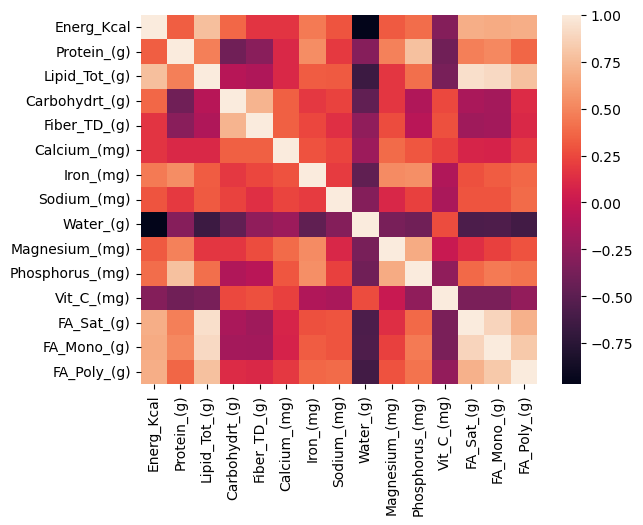

In [25]:
cor_matrice = data.corr(method='spearman')
sns.heatmap(cor_matrice)

<Axes: >

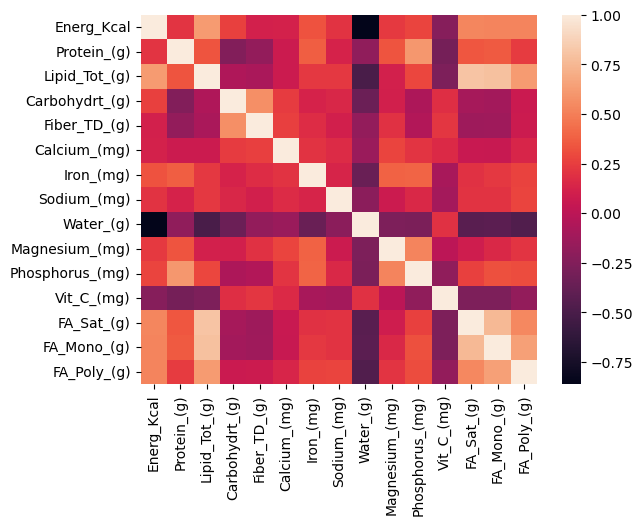

In [26]:
cor_matrice = data.corr(method='kendall')
sns.heatmap(cor_matrice)

### Analyse des Composantes Principales

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

In [28]:
from sklearn.decomposition import PCA
pca = PCA()

In [29]:
data_pca = pca.fit_transform(data_scale)

### choix du nombres d'axes

In [30]:
comp = pd.DataFrame(
     {
        'Dimensions':['Dim '+ str(x+1) for x in range(len(data.columns))],
        'valeur propre':pca.explained_variance_,
        '% variance expliquee':np.round(pca.explained_variance_ratio_*100),
        'cumul var expliquee':np.round(np.cumsum(pca.explained_variance_ratio_)*100)   
    },
    columns=[ 'Dimensions','valeur propre','% variance expliquee','cumul var expliquee']
)
comp  

Dimensions  valeur propre  % variance expliquee  cumul var expliquee
0       Dim 1       4.405104                  29.0                 29.0
1       Dim 2       2.803363                  19.0                 48.0
2       Dim 3       1.707862                  11.0                 59.0
3       Dim 4       1.107273                   7.0                 67.0
4       Dim 5       1.014667                   7.0                 74.0
5       Dim 6       0.846930                   6.0                 79.0
6       Dim 7       0.795014                   5.0                 85.0
7       Dim 8       0.688128                   5.0                 89.0
8       Dim 9       0.628821                   4.0                 93.0
9      Dim 10       0.372836                   2.0                 96.0
10     Dim 11       0.333494                   2.0                 98.0
11     Dim 12       0.258182                   2.0                100.0
12     Dim 13       0.034260                   0.0                100.0
13     Dim 14       0.003703                   0.0                100.0
14     Dim 15       0.002070                   0.0                100.0

C:\Users\Fouodji Prudencia\AppData\Local\Temp\ipykernel_20848\1104577791.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comp,x='Dimensions',y='% variance expliquee',palette=['purple'])
C:\Users\Fouodji Prudencia\AppData\Local\Temp\ipykernel_20848\1104577791.py:1: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=comp,x='Dimensions',y='% variance expliquee',palette=['purple'])


Text(5, 26, '25%')

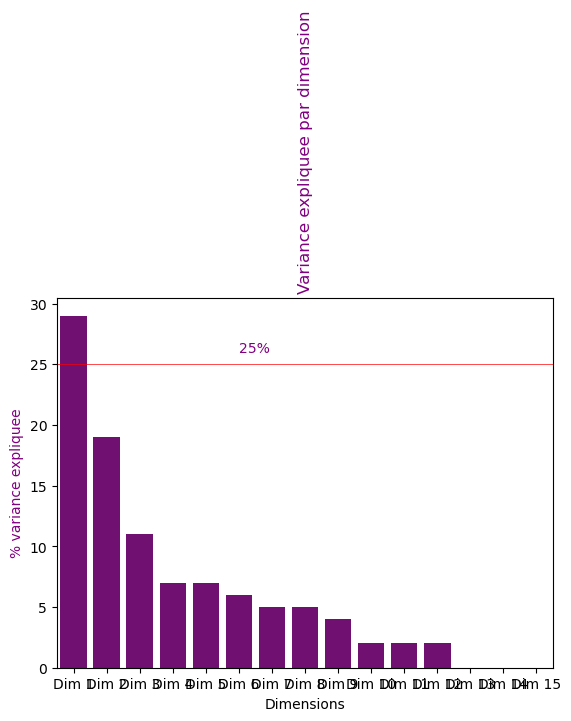

In [100]:
sns.barplot(data=comp,x='Dimensions',y='% variance expliquee',palette=['purple'])
plt.ylabel('% variance expliquee',c='purple')
plt.title('Variance expliquee par dimension',c='purple')
plt.axhline(y = 25, linewidth= .5,color='r',linestyle = '-')
plt.text(5,26,'25%',c='purple')

In [32]:
cos_carre = np.square(pca.components_)


In [42]:
cos_carre_tab = pd.DataFrame(cos_carre, columns=[ 'PC{}'.format(i+1) for i in range(data.shape[1]) ])
cos_carre_tab.index=data.columns[:]
cos_carre_tab

PC1       PC2       PC3       PC4       PC5       PC6  \
Energ_Kcal       0.206126  0.004336  0.147326  0.042977  0.026473  0.019409   
Protein_(g)      0.006358  0.001295  0.109536  0.105154  0.129334  0.094299   
Lipid_Tot_(g)    0.010790  0.345235  0.002410  0.217305  0.033364  0.066420   
Carbohydrt_(g)   0.000298  0.033107  0.000802  0.012776  0.060937  0.098192   
Fiber_TD_(g)     0.006766  0.055486  0.008253  0.018757  0.000912  0.071693   
Calcium_(mg)     0.036521  0.090782  0.005825  0.060446  0.115581  0.004492   
Iron_(mg)        0.003800  0.192562  0.005529  0.000394  0.000964  0.333863   
Sodium_(mg)      0.007429  0.000595  0.010364  0.072228  0.026313  0.001582   
Water_(g)        0.002239  0.003078  0.001477  0.005394  0.212795  0.005292   
Magnesium_(mg)   0.000584  0.083650  0.000078  0.004900  0.380944  0.021431   
Phosphorus_(mg)  0.000585  0.002450  0.000141  0.004531  0.000766  0.008679   
Vit_C_(mg)       0.005120  0.115147  0.000932  0.000001  0.010383  0.274307   
FA_Sat_(g)       0.128366  0.017842  0.340858  0.082377  0.000208  0.000106   
FA_Mono_(g)      0.518027  0.018730  0.330548  0.106837  0.000830  0.000015   
FA_Poly_(g)      0.066991  0.035703  0.035922  0.265922  0.000196  0.000221   

                      PC7           PC8       PC9      PC10      PC11  \
Energ_Kcal       0.022254  2.564298e-03  0.171024  0.044893  0.028773   
Protein_(g)      0.124030  4.976860e-03  0.022952  0.114670  0.065262   
Lipid_Tot_(g)    0.000445  2.084008e-03  0.030951  0.022935  0.252070   
Carbohydrt_(g)   0.017378  6.330008e-01  0.008551  0.094630  0.013851   
Fiber_TD_(g)     0.002791  2.054730e-04  0.021396  0.000585  0.000546   
Calcium_(mg)     0.007682  4.904369e-02  0.066109  0.080590  0.000242   
Iron_(mg)        0.010115  2.038367e-01  0.023086  0.023639  0.014952   
Sodium_(mg)      0.474192  7.873347e-02  0.025765  0.000143  0.164133   
Water_(g)        0.274398  1.766262e-02  0.002532  0.093902  0.000291   
Magnesium_(mg)   0.005251  2.351297e-03  0.001237  0.479283  0.000011   
Phosphorus_(mg)  0.004378  2.693029e-04  0.001421  0.000145  0.002540   
Vit_C_(mg)       0.057045  1.331552e-03  0.009188  0.044194  0.456798   
FA_Sat_(g)       0.000023  1.352084e-07  0.002159  0.000132  0.000280   
FA_Mono_(g)      0.000013  1.269464e-04  0.022774  0.000144  0.000070   
FA_Poly_(g)      0.000005  3.812919e-03  0.590855  0.000117  0.000180   

                     PC12      PC13      PC14      PC15  
Energ_Kcal       0.000005  0.079920  0.110445  0.093475  
Protein_(g)      0.010806  0.079303  0.093374  0.038652  
Lipid_Tot_(g)    0.004571  0.002224  0.007579  0.001616  
Carbohydrt_(g)   0.014362  0.003365  0.004979  0.003772  
Fiber_TD_(g)     0.792702  0.003820  0.007274  0.008813  
Calcium_(mg)     0.065452  0.125199  0.029562  0.262473  
Iron_(mg)        0.105087  0.070927  0.000166  0.011079  
Sodium_(mg)      0.000503  0.082369  0.009936  0.045712  
Water_(g)        0.000903  0.205959  0.002504  0.171575  
Magnesium_(mg)   0.003694  0.009633  0.001005  0.005949  
Phosphorus_(mg)  0.000189  0.165267  0.548928  0.259711  
Vit_C_(mg)       0.001653  0.005125  0.011988  0.006788  
FA_Sat_(g)       0.000019  0.166223  0.171537  0.089868  
FA_Mono_(g)      0.000043  0.000632  0.000702  0.000508  
FA_Poly_(g)      0.000011  0.000034  0.000022  0.000008

Text(0.5, 1.0, 'cosinus carre des variables au 3eme axe principal')

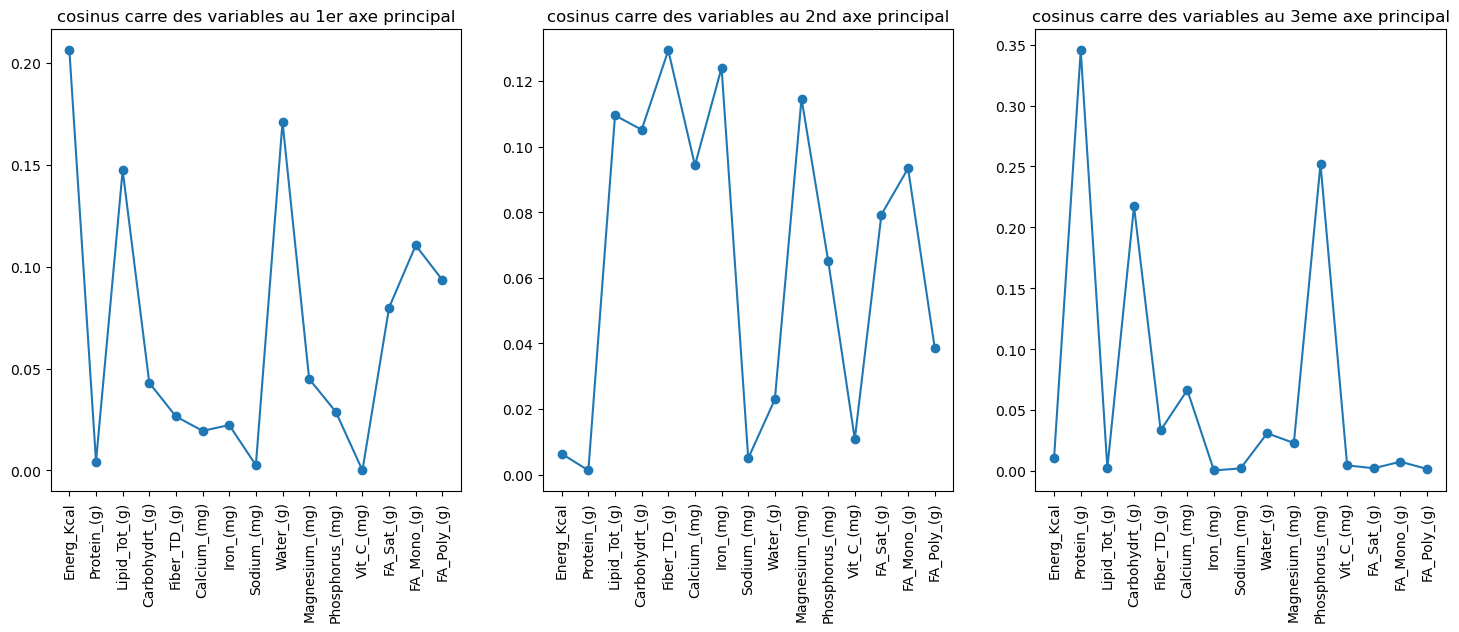

In [73]:
#calculons les carres des cosinus des variables sur les axes principaux
cos2 = pca.components_**2
rows_sums = cos2.sum(axis=1)
cos2 = cos2/rows_sums[:,np.newaxis]
# graphique des cosinus carres sur les trois premiers axes principales
n_comp = pca.n_components_
fig, axs = plt.subplots(1,3,figsize=(18,6))

axs[0].plot(range(1,len(data.columns)+1),cos2[0,:],'-o')
axs[0].set_xticks(range(1,len(data.columns)+1))
axs[0].set_xticklabels(data.columns,rotation =90)
axs[0].set_title('cosinus carre des variables au 1er axe principal')

axs[1].plot(range(1,len(data.columns)+1), cos2[1,:],'-o')
axs[1].set_xticks(range(1,len(data.columns)+1))
axs[1].set_xticklabels(data.columns,rotation=90)
axs[1].set_title('cosinus carre des variables au 2nd axe principal')

axs[2].plot(range(1,len(data.columns)+1),cos2[2,:],'-o')
axs[2].set_xticks(range(1,len(data.columns)+1))
axs[2].set_xticklabels(data.columns,rotation=90)
axs[2].set_title('cosinus carre des variables au 3eme axe principal')



In [74]:
data.index

Index([ 1001,  1002,  1003,  1004,  1005,  1006,  1007,  1008,  1009,  1010,
       ...
       44258, 44259, 44260, 48052, 80200, 83110, 90240, 90480, 90560, 93600],
      dtype='int64', name='NDB_No', length=8790)

In [87]:
# contribution a la formation de l'axe
#obtenir les composants principales 
components = pca.components_
n_components = data.shape[1]
feature_names = data.columns[:]
#calcule des contributions
loading = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loading**2)*eigenvalues

#data frame pour stoker les contributions
column_names = [f'pc{i+1}_contrib' for i in range(n_components)]
variable_contributions = pd.DataFrame(variable_contributions,columns = column_names,index = feature_names)
variable_contributions

pc1_contrib  pc2_contrib  pc3_contrib  pc4_contrib  \
Energ_Kcal          0.908005     0.017823     0.018428     0.000330   
Protein_(g)         0.019103     0.003629     0.589614     0.036659   
Lipid_Tot_(g)       0.648985     0.307069     0.004117     0.000888   
Carbohydrt_(g)      0.189316     0.294784     0.371126     0.014146   
Fiber_TD_(g)        0.116616     0.362570     0.056981     0.067474   
Calcium_(mg)        0.085498     0.264353     0.113436     0.108725   
Iron_(mg)           0.098032     0.347702     0.000761     0.019242   
Sodium_(mg)         0.011296     0.013952     0.003559     0.700905   
Water_(g)           0.753380     0.064343     0.052859     0.009468   
Magnesium_(mg)      0.197758     0.321460     0.039170     0.104781   
Phosphorus_(mg)     0.126750     0.182954     0.430501     0.015337   
Vit_C_(mg)          0.000022     0.030293     0.007807     0.015903   
FA_Sat_(g)          0.352057     0.222315     0.003798     0.003726   
FA_Mono_(g)         0.486520     0.261762     0.012944     0.005513   
FA_Poly_(g)         0.411767     0.108354     0.002761     0.004177   

                 pc5_contrib  pc6_contrib  pc7_contrib  pc8_contrib  \
Energ_Kcal          0.006865     0.030931     0.003021     0.005112   
Protein_(g)         0.056300     0.076886     0.153090     0.000410   
Lipid_Tot_(g)       0.008374     0.004933     0.004395     0.007132   
Carbohydrt_(g)      0.019033     0.051194     0.000314     0.049702   
Fiber_TD_(g)        0.000925     0.097889     0.000767     0.018107   
Calcium_(mg)        0.072745     0.003804     0.265426     0.001089   
Iron_(mg)           0.002832     0.006506     0.008042     0.326305   
Sodium_(mg)         0.000208     0.041537     0.162053     0.054179   
Water_(g)           0.021710     0.055990     0.018353     0.017730   
Magnesium_(mg)      0.000593     0.068254     0.018793     0.000099   
Phosphorus_(mg)     0.000554     0.000205     0.011887     0.112945   
Vit_C_(mg)          0.804329     0.055434     0.083546     0.000346   
FA_Sat_(g)          0.003876     0.106034     0.056388     0.056681   
FA_Mono_(g)         0.007381     0.025037     0.000132     0.006837   
FA_Poly_(g)         0.008942     0.222296     0.008808     0.031456   

                 pc9_contrib  pc10_contrib  pc11_contrib  pc12_contrib  \
Energ_Kcal          0.001408      0.000218      0.000195  1.321965e-03   
Protein_(g)         0.001936      0.031188      0.000817  2.972895e-02   
Lipid_Tot_(g)       0.000928      0.000029      0.000047  2.404963e-04   
Carbohydrt_(g)      0.003392      0.001827      0.001511  2.868021e-07   
Fiber_TD_(g)        0.133810      0.142030      0.000256  2.680754e-03   
Calcium_(mg)        0.003327      0.007990      0.002894  7.082097e-02   
Iron_(mg)           0.172547      0.001958      0.001460  1.472797e-02   
Sodium_(mg)         0.011107      0.000877      0.000090  3.437825e-04   
Water_(g)           0.001592      0.000461      0.000474  2.372076e-03   
Magnesium_(mg)      0.059047      0.178694      0.000048  1.141010e-02   
Phosphorus_(mg)     0.000183      0.000004      0.000847  1.179368e-01   
Vit_C_(mg)          0.000568      0.001377      0.000063  4.268891e-04   
FA_Sat_(g)          0.129511      0.003591      0.055116  1.323152e-03   
FA_Mono_(g)         0.001575      0.000375      0.183064  3.094979e-03   
FA_Poly_(g)         0.107890      0.002218      0.086612  1.752592e-03   

                 pc13_contrib  pc14_contrib  pc15_contrib  
Energ_Kcal       4.397854e-03  1.918494e-03  1.386724e-04  
Protein_(g)      6.112860e-04  6.936622e-05  7.390589e-05  
Lipid_Tot_(g)    1.167794e-02  1.224175e-03  7.435829e-05  
Carbohydrt_(g)   2.822283e-03  3.956669e-04  5.504613e-04  
Fiber_TD_(g)     7.120005e-06  3.072540e-06  4.066692e-07  
Calcium_(mg)     3.632486e-06  5.387715e-08  4.582588e-07  
Iron_(mg)        7.995526e-07  4.966122e-08  9.938823e-09  
Sodium_(mg)      4.632293e-09  4.701415e-07  7.892773e-06  
Water_(g)        7

#### graphique et interpretation


In [93]:
def correlation_graph(pca,
                      x_y,
                      features):
    
    x,y=x_y
    
    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))
    
    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):
    
        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=12, weight='bold',color='b')
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='-')
    plt.plot([0, 0], [-1, 1], color='grey', ls='-')
    
    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    # Titre du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
    
    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    
    # Axes et display
    plt.axis('equal')
    plt.savefig('CorrGraph_{}.jpg'.format(x_y), bbox_inches='tight')
    plt.show(block=False)

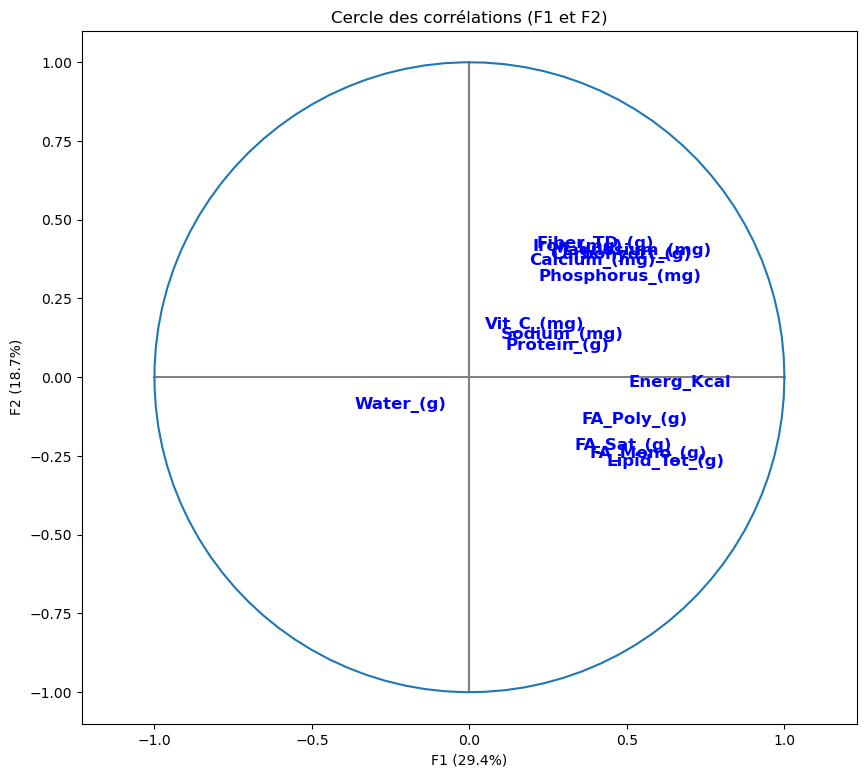

In [95]:
x_y = (0,1)
x_y
correlation_graph(pca, x_y, data.columns)

#### 

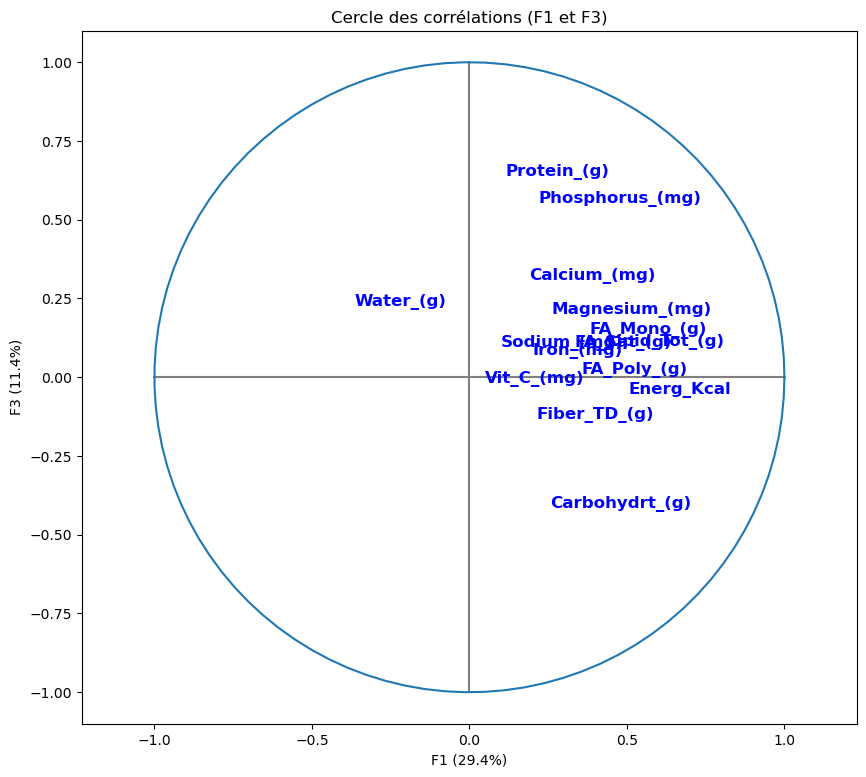

In [97]:
#pour F2 et F3
x_y = (0,2)
x_y
correlation_graph(pca, x_y, data.columns)

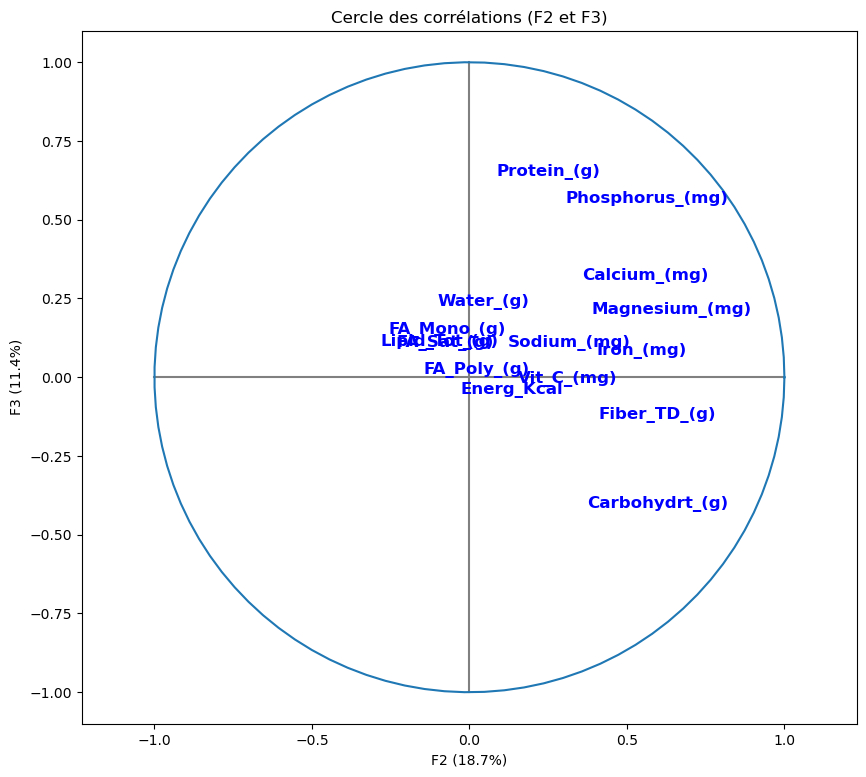

In [98]:
#pour F2 et F1
x_y = (1,2)
x_y
correlation_graph(pca, x_y, data.columns)